In [1]:
# Built on Python 3.6.8
import numpy as np #numpy version 1.16.3
from skimage import color #skimage version 0.15.0

In [2]:
#Import Data
parameters = np.load('./cifar-10-npy/binning_parameters.npy')
dictionary = np.load('./cifar-10-npy/bins_to_ab_dictionary.npy', allow_pickle=True)
dictionary = dictionary.tolist()
bins = np.load('./cifar-10-npy/test_labels_predictions.npy')
l = np.load('./cifar-10-npy/test_data_predictions.npy')
l = np.reshape(l, newshape=(len(l),len(l[0]),len(l[0][0]),1))

In [3]:
#Convert from Bins to AB
inf_array = parameters[0:2]
grid_size = parameters[2]

image_ab = np.zeros((len(bins),len(bins[0]),len(bins[0][0]),2))
np.shape(image_ab)
for n in range(0, len(bins)):
    for i in range(0, len(bins[0])):
        for j in range(0, len(bins[0][0])):
            ab_tuple = dictionary[bins[n][i][j][0]]
            image_ab[n][i][j][0] = ab_tuple[0]
            image_ab[n][i][j][1] = ab_tuple[1]
            
image_ab = image_ab + 0.5 #Add .5 to both a and b so that middle value in bin is selected
image_ab = image_ab * grid_size
image_ab = image_ab + inf_array

In [4]:
#Build LAB Array
image_lab = np.concatenate((l, image_ab), axis=3)

In [5]:
# Convert from LAB to RGB
N = len(image_lab)
image_rgb = np.ndarray(image_lab.shape)
for n in range(0, N):
    image_rgb[n] = color.lab2rgb(image_lab[n])
    if (n+1)%1000==0:
        print((n+1),' images converted to RGB.')

c:\users\hara kumar\appdata\local\programs\python\python36\lib\site-packages\skimage\color\colorconv.py:988: UserWarning: Color data out of range: Z < 0 in 486 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)
c:\users\hara kumar\appdata\local\programs\python\python36\lib\site-packages\skimage\color\colorconv.py:988: UserWarning: Color data out of range: Z < 0 in 265 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)
c:\users\hara kumar\appdata\local\programs\python\python36\lib\site-packages\skimage\color\colorconv.py:988: UserWarning: Color data out of range: Z < 0 in 371 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)
c:\users\hara kumar\appdata\local\programs\python\python36\lib\site-packages\skimage\color\colorconv.py:988: UserWarning: Color data out of range: Z < 0 in 253 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)


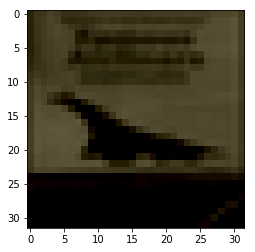

In [9]:
import matplotlib.pyplot as plt
plt.imshow(image_rgb[3])
plt.show()